# SF Crime PSET 1

1. [Introduction](#intro)
2. [Getting the Data](#data)
3. [Descriptive Statistics](#stats)
4. [Geographic Information Systems](#gis)
5. [Discussion Questions](#dq)

In [54]:
# imports
import requests
from datascience import *
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## 1. Introduction <a id='intro'></a>

For this lab, we will be working with the San Francisco Police Department's Incident Database. The dataset contains up-to-date information on incidents reported to the SFPD. Each observation is tagged with information about the incident's location, type of infraaction, and date/time. In this lab you will:

1. Download the data through an Application Programming Interface (API)
2. Explore the data with summary and descriptive statistics
3. Map the incidents

Make sure to start early and ask lots of questions! The dataset, along with other publicaly available data, is available at: https://data.sfgov.org/Public-Safety/Police-Department-Incidents/tmnf-yvry

## 2. Getting the Data <a id='data'></a>

Write code that pulls the data into your environment with an API call. Here is the link to the API: https://data.sfgov.org/resource/PdId.json

In [55]:
# the url that we want to get our data from
data_url = 'https://data.sfgov.org/resource/PdId.json'

# making our http request to DATA_URL
response = requests.get(data_url)
# using the built-in json decoder of the requests library to interpret the text
json_response = response.json()
json_response[:3]

[{'address': 'SOUTH VAN NESS AV / 19TH ST',
  'category': 'OTHER OFFENSES',
  'date': '2017-12-08T00:00:00',
  'dayofweek': 'Friday',
  'descript': 'TRAFFIC VIOLATION ARREST',
  'incidntnum': '170994999',
  'location': {'human_address': '{"address":"","city":"","state":"","zip":""}',
   'latitude': '37.76036569315729',
   'longitude': '-122.41702839210588',
   'needs_recoding': False},
  'pddistrict': 'MISSION',
  'pdid': '17099499965010',
  'resolution': 'ARREST, BOOKED',
  'time': '23:54',
  'x': '-122.41702839210588',
  'y': '37.76036569315729'},
 {'address': 'SOUTH VAN NESS AV / 19TH ST',
  'category': 'OTHER OFFENSES',
  'date': '2017-12-08T00:00:00',
  'dayofweek': 'Friday',
  'descript': 'DRIVERS LICENSE, SUSPENDED OR REVOKED',
  'incidntnum': '170994999',
  'location': {'human_address': '{"address":"","city":"","state":"","zip":""}',
   'latitude': '37.76036569315729',
   'longitude': '-122.41702839210588',
   'needs_recoding': False},
  'pddistrict': 'MISSION',
  'pdid': '1709

In [75]:
# making a table out of our json
data = Table.from_records(json_response)
data.show(3)

address,category,date,dayofweek,descript,incidntnum,location,pddistrict,pdid,resolution,time,x,y
SOUTH VAN NESS AV / 19TH ST,OTHER OFFENSES,2017-12-08T00:00:00,Friday,TRAFFIC VIOLATION ARREST,170994999,"{'latitude': '37.76036569315729', 'human_address': '{""ad ...",MISSION,17099499965010,"ARREST, BOOKED",23:54,-122.41702839210588,37.76036569315729
SOUTH VAN NESS AV / 19TH ST,OTHER OFFENSES,2017-12-08T00:00:00,Friday,"DRIVERS LICENSE, SUSPENDED OR REVOKED",170994999,"{'latitude': '37.76036569315729', 'human_address': '{""ad ...",MISSION,17099499965016,"ARREST, BOOKED",23:54,-122.41702839210588,37.76036569315729
1500 Block of SUTTER ST,FRAUD,2017-12-08T00:00:00,Friday,"CREDIT CARD, THEFT BY USE OF",170996155,"{'latitude': '37.78707981444431', 'human_address': '{""ad ...",NORTHERN,17099615509320,NONE,23:50,-122.42588335814763,37.78707981444431


<font color='blue'><b>QUESTION: What are the advantages to downloading data this way, instead of with a point-and-click action?</b></font color>

## 3. Descriptive Statistics <a id='stats'></a>

Plot the number of incidents per year from 2000-2017 (choose the appropriate type of plot). Have crime rates increased or decreased in general? 

In [77]:
# creating a year column from the first four characters of the 'date' column
data['year'] = [int(d[:4]) for d in data['date']]

In [82]:
agg_on_year = data.group('year')
agg_on_year

year,count
2017,1000


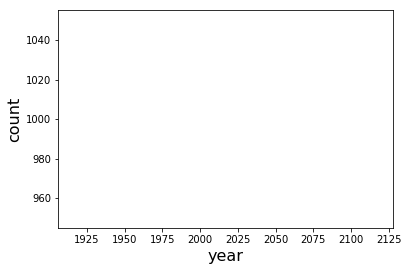

In [146]:
agg_on_year.plot('year', 'count')

Looking just at 2017, what proportion of the total does each type of crime constitute? Use at least one table and at least one plot to support your answer.

In [98]:
agg_by_crime = data.where('year', 2017).group('category')
agg_by_crime['proportion'] = [count / sum(agg_by_crime.column('count')) for count in agg_by_crime.column('count')]
agg_by_crime.sort('proportion', descending=True)

category,count,proportion
LARCENY/THEFT,338,0.338
NON-CRIMINAL,116,0.116
OTHER OFFENSES,101,0.101
ASSAULT,78,0.078
VANDALISM,55,0.055
SUSPICIOUS OCC,36,0.036
WARRANTS,35,0.035
VEHICLE THEFT,32,0.032
PROSTITUTION,32,0.032
BURGLARY,32,0.032


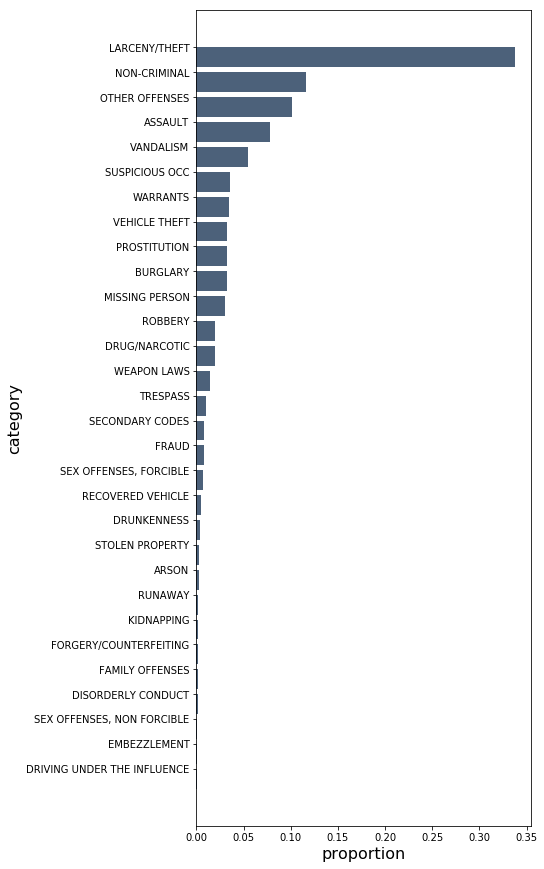

In [100]:
agg_by_crime.sort('count', descending=True).barh('category', 'proportion')

Is there a relationship between day of week, time, and whether an incident occurs? Bonus: Is there a relationship between day/time and particular types of incidents?

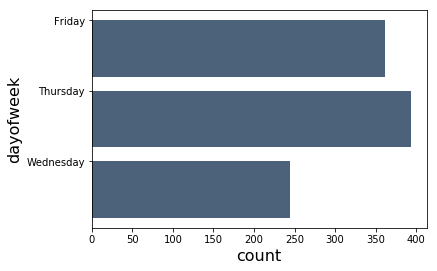

In [106]:
data.group('dayofweek').barh('dayofweek')

In [143]:
# making an hour column that can be grouped on
data['hour'] = [int(t[:2]) for t in data['time']]

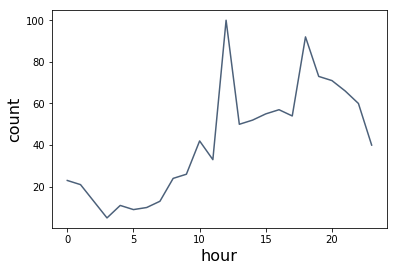

In [144]:
data.group('hour').plot('hour', 'count')

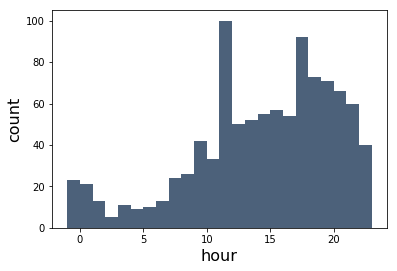

In [145]:
data.group('hour').bar('hour')

Bonus: Are there any other interesting relationships in the data?

# 4. Geographic Information Systems (GIS) <a id='gis'></a>

Plot individual incidents in 2017 as points on a map of San Francisco. Does crime seem randomly distributed in space, or do incidents tend to cluster close together? Propose an explanation for your conclusion. Bonus: Shade the points by type of crime.

Hint: Use the `basemap` extension to the `matplotlib` package!

Merge the incidents data with either a Shapefile or GeoJSON file with information on the boundaries of neighborhoods in San Francisco. 

The neighborhood data is available here: https://data.sfgov.org/Geographic-Locations-and-Boundaries/Analysis-Neighborhoods/p5b7-5n3h

The API endpoint: https://data.sfgov.org/resource/xfcw-9evu.json

Construct a choropleth map, coloring in each neighborhood by how many incidents it had in 2017. Bonus: Construct several maps that explore differences by day of week, time of year, time of day, etc.

Do you notice any patters? Are there particular neighborhoods where crime concentrates more heavily?

# 5. Discussion Questions <a id='dq'></a>

Based on the evidence from this lab assignment, why do you think "hot spots" policing became more popular in the last few decades? What are the pros and cons to this kind of approach?

What other sorts of data would help improve your analysis?